In [255]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns

In [276]:
data1 = pd.read_csv("data/geoMap.csv", sep=",")

In [295]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Регионы                           83 non-null     object
 1   кошки: (02.10.2021 – 02.10.2022)  83 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


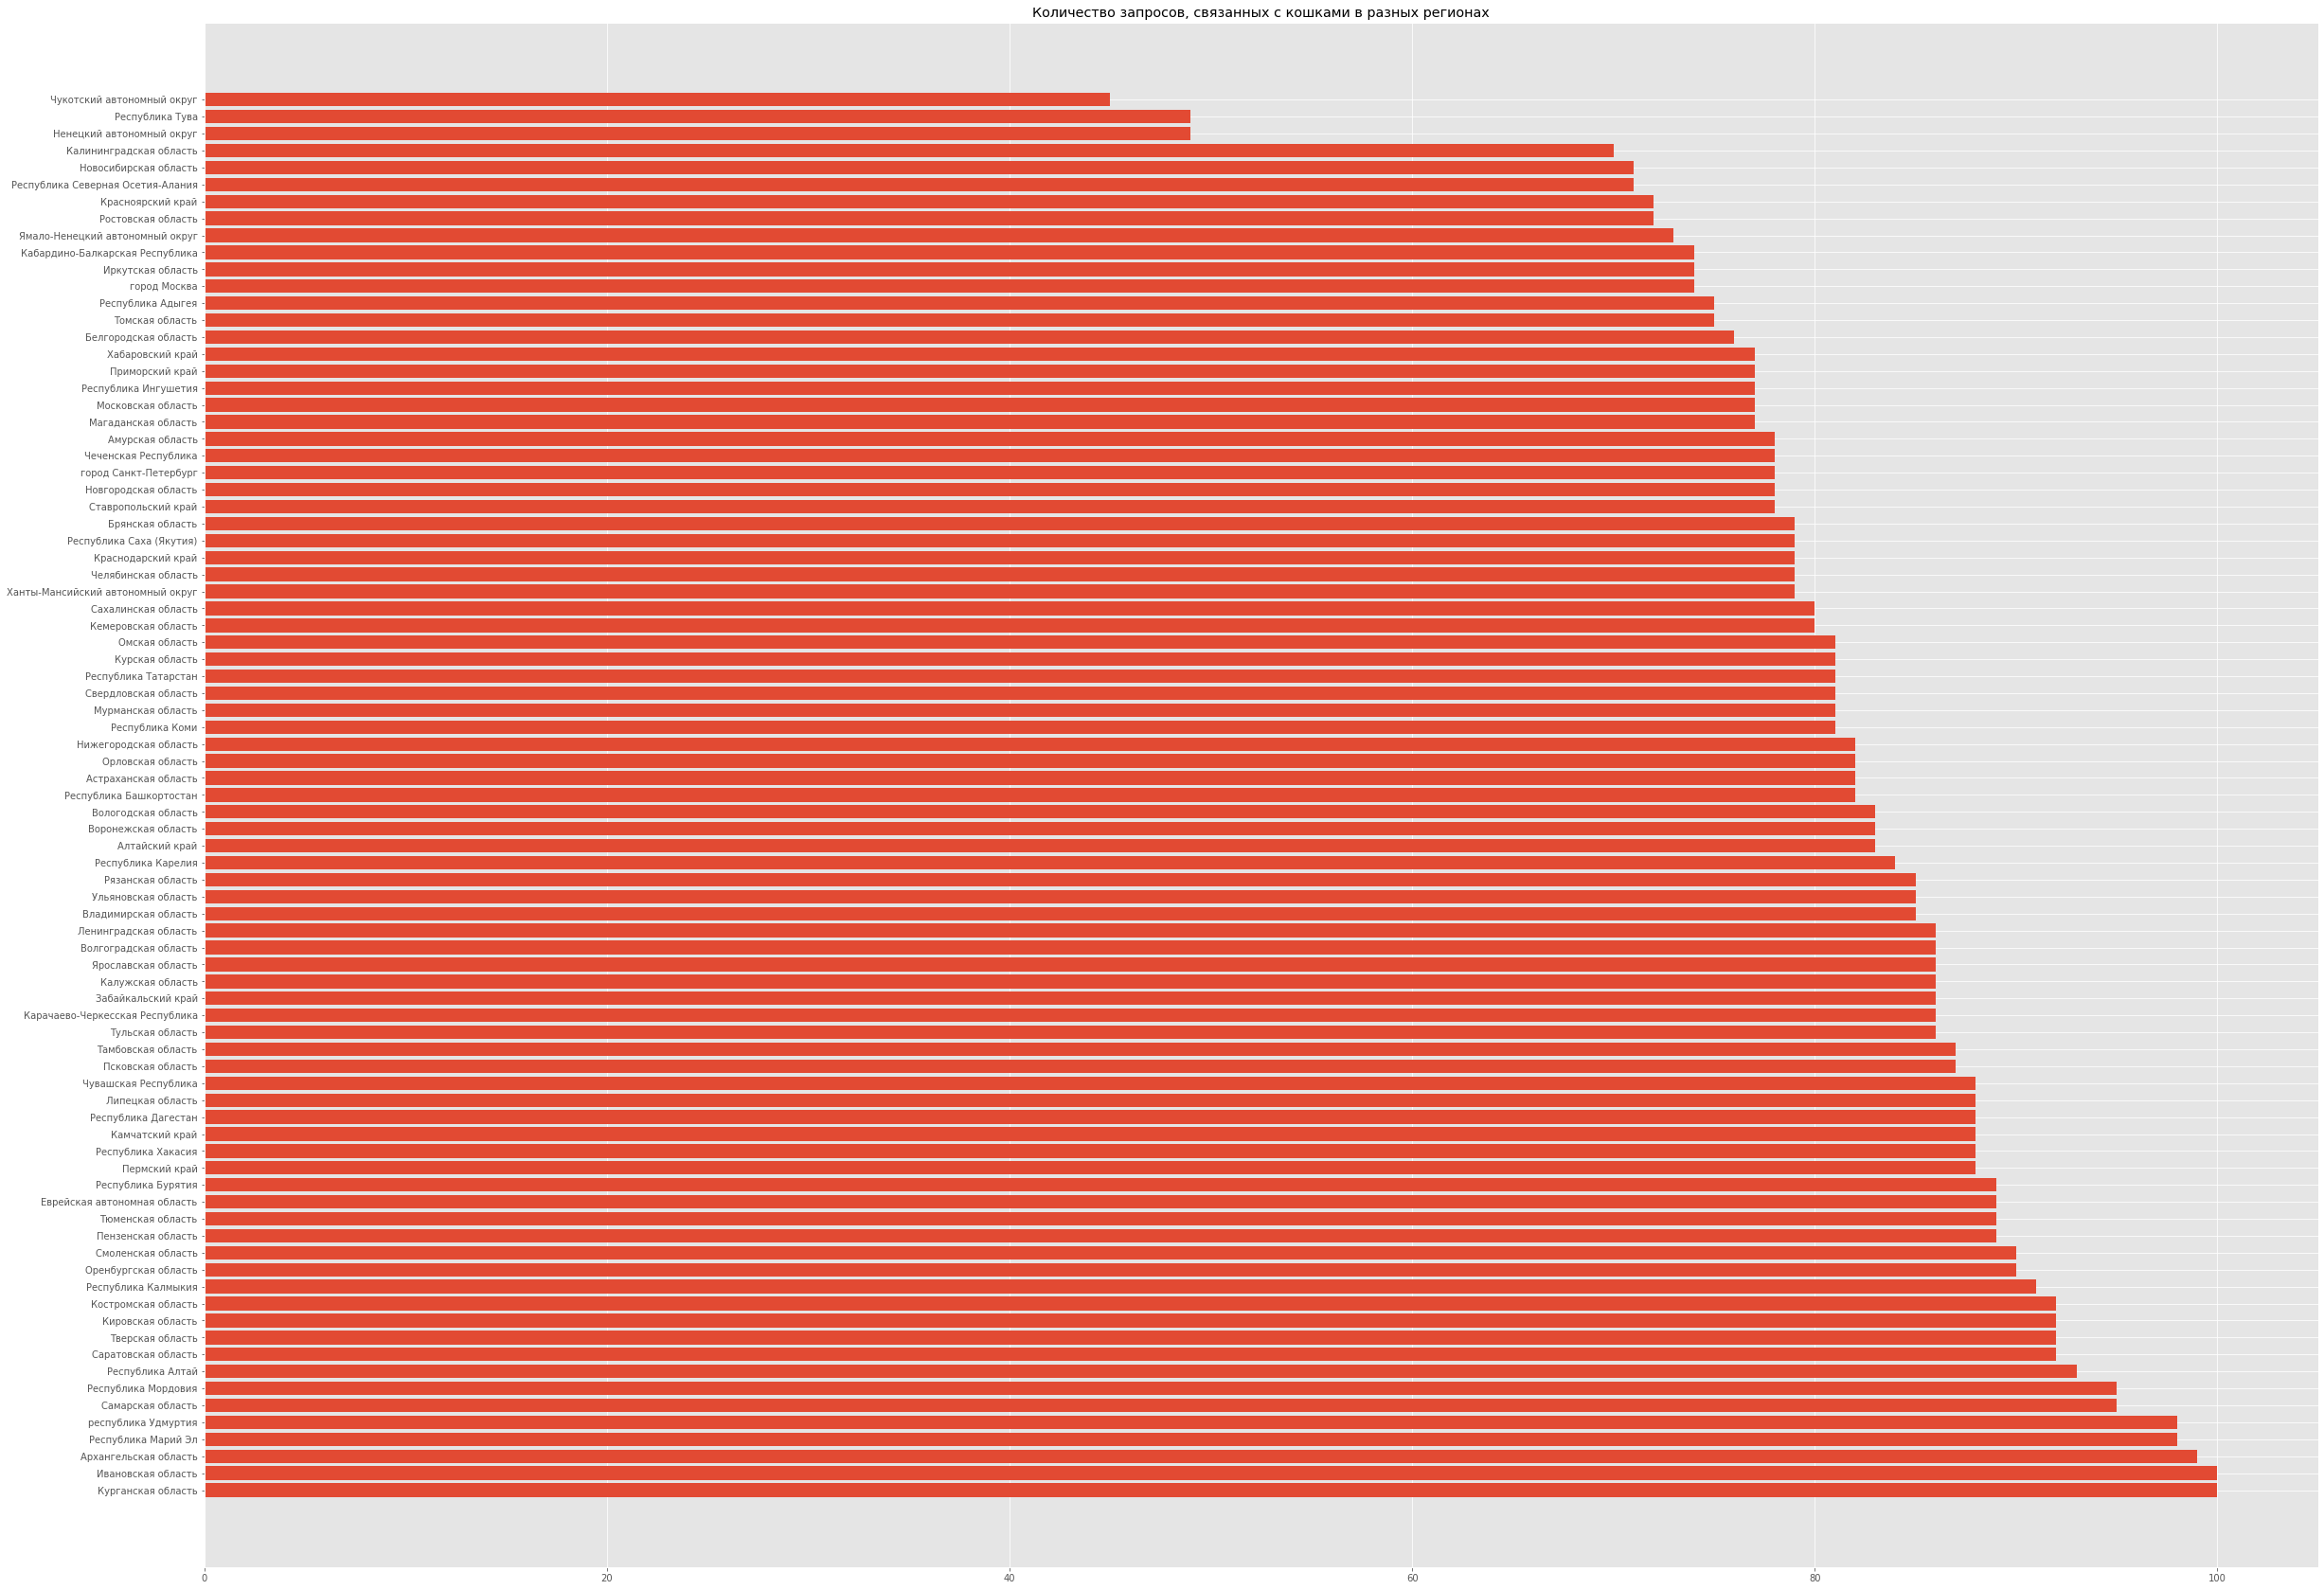

In [296]:
fig, ax = plt.subplots()
ax.barh(data1["Регионы"], data1["кошки: (02.10.2021 – 02.10.2022)"])
ax.set_yticks(data1["Регионы"])
ax.set_yticklabels(data1["Регионы"], fontsize = 10)
ax.set_title("Количество запросов, связанных с кошками в разных регионах")
fig.set_figwidth(40)
fig.set_figheight(30)
plt.savefig('charts/white_version/cats.png')

In [297]:
data2 = pd.read_csv("data/geoMap_1.csv", sep=",")

In [298]:
data2.head()

,Регионы,собаки: (02.10.2021 – 02.10.2022)
0,Ненецкий автономный округ,100
1,Сахалинская область,94
2,Камчатский край,91
3,Чукотский автономный округ,90
4,Псковская область,89


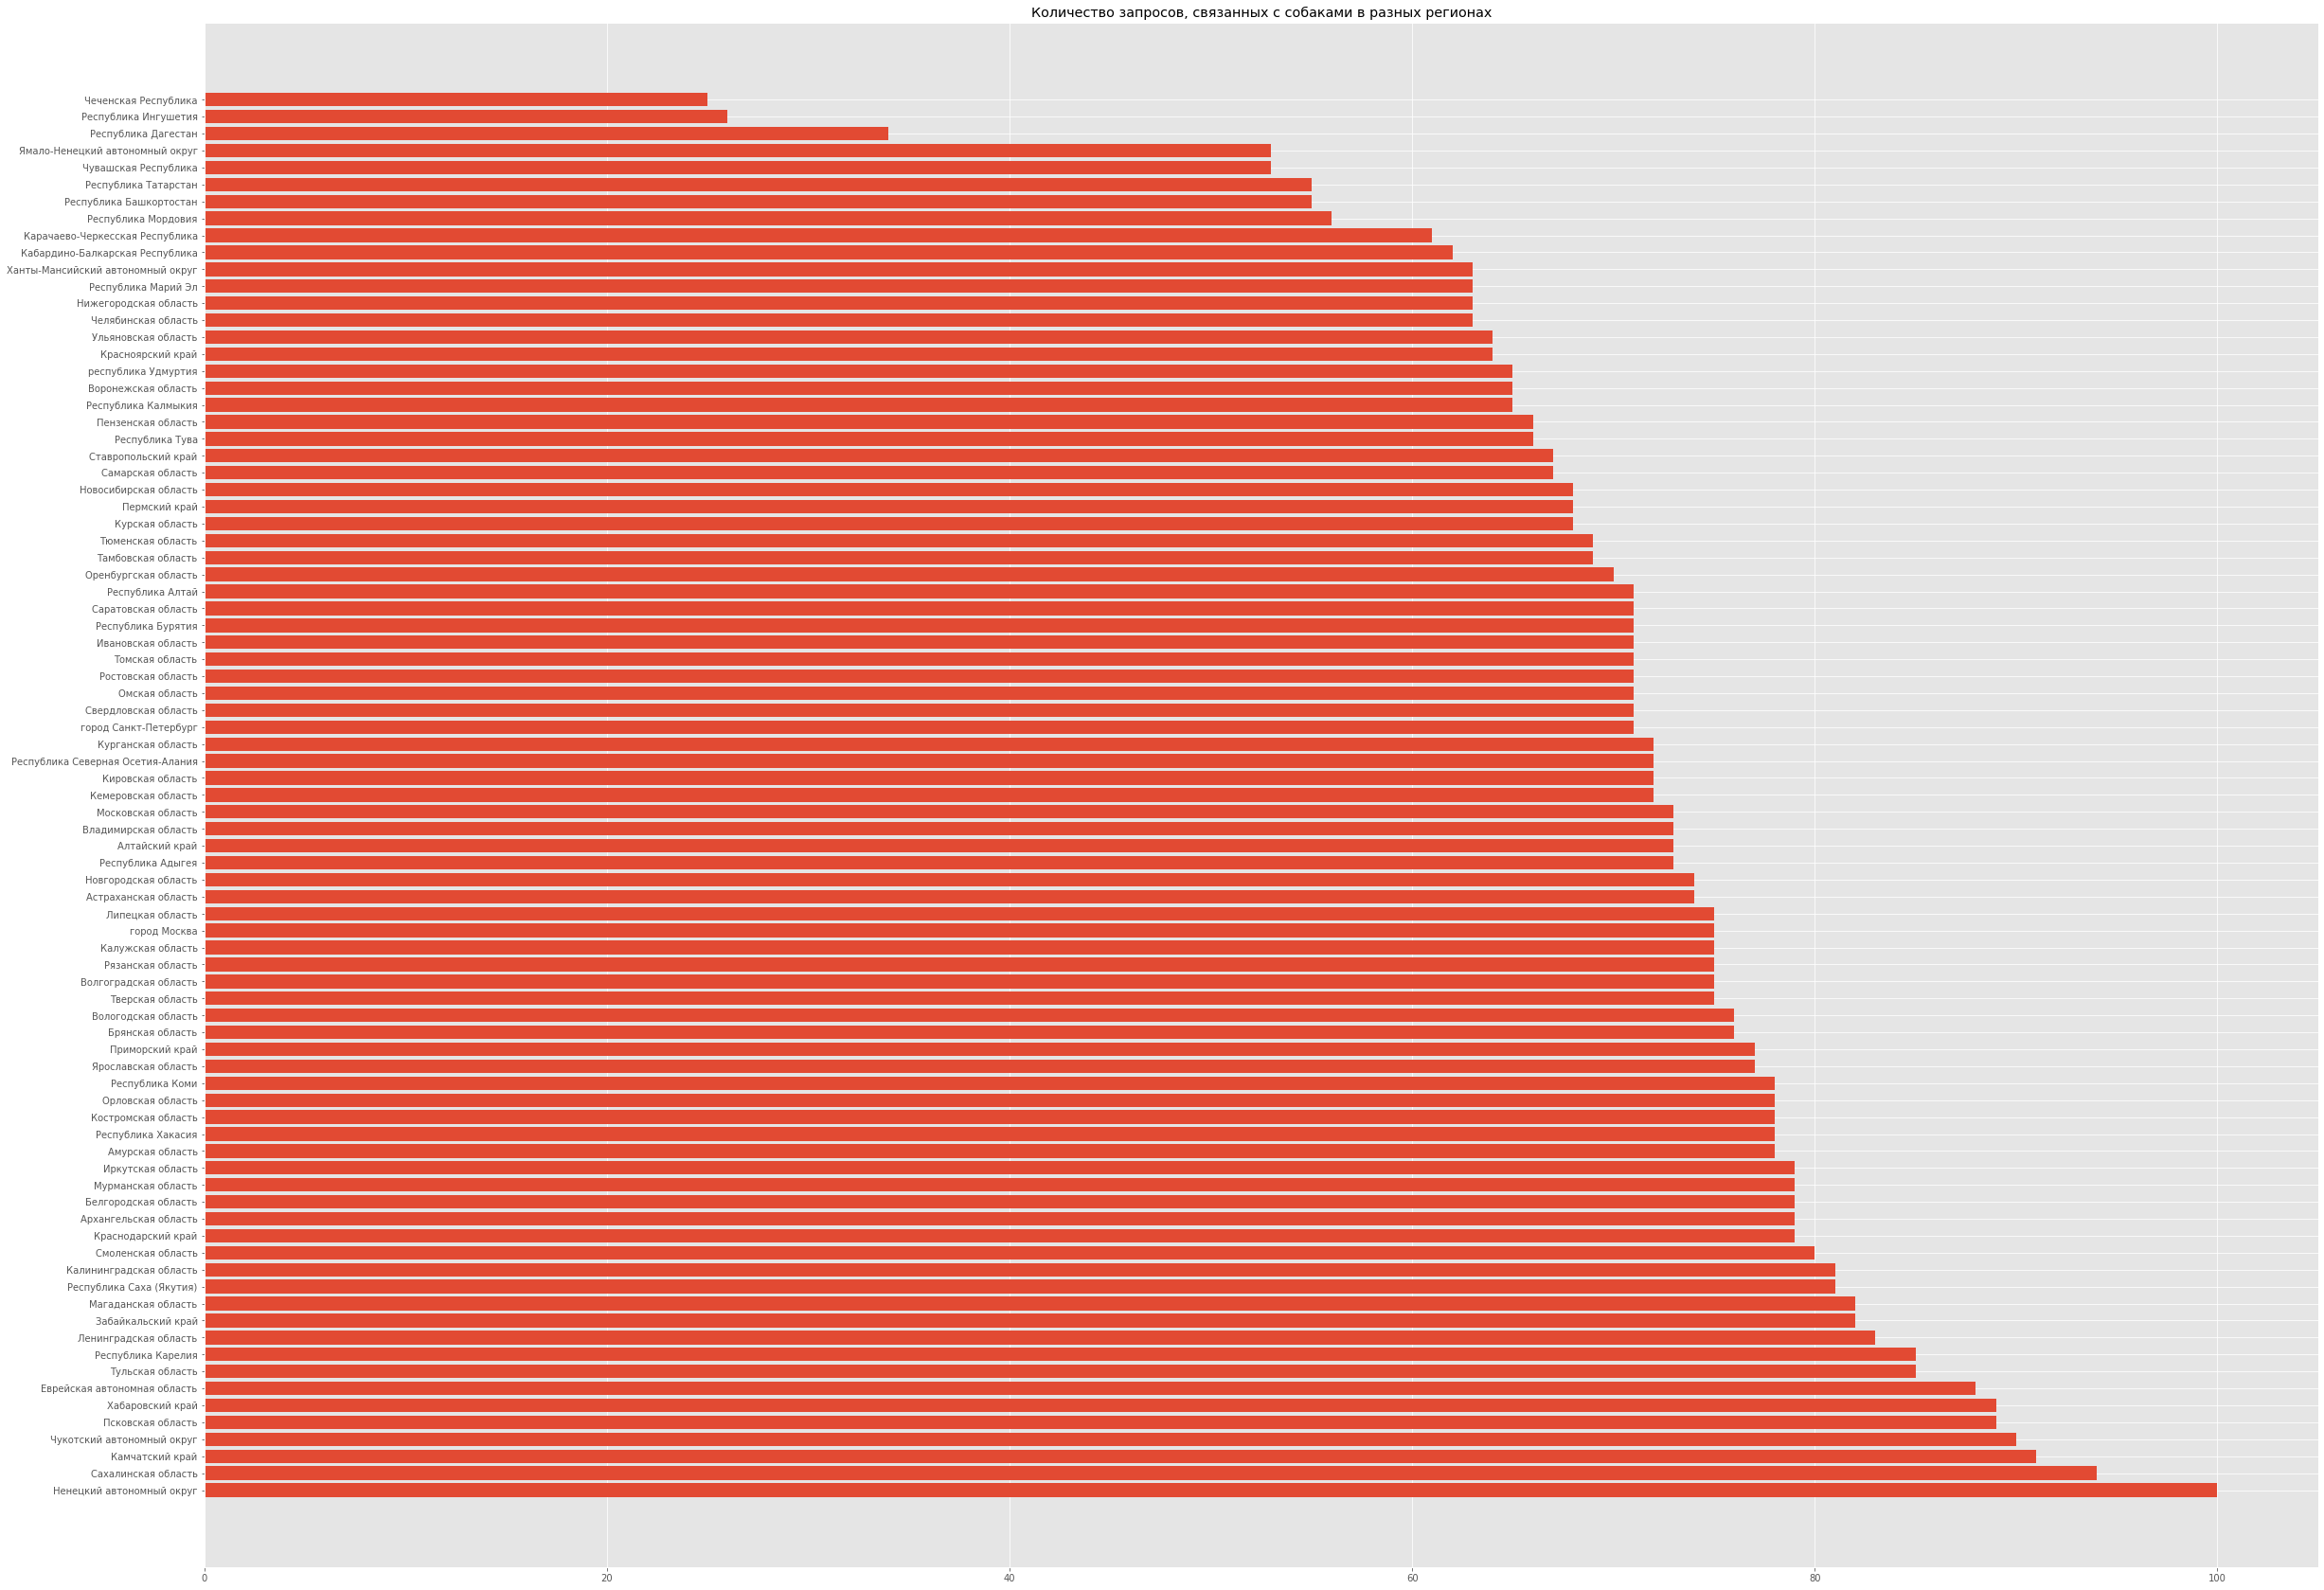

In [299]:
fig, ax = plt.subplots()
ax.barh(data2["Регионы"], data2["собаки: (02.10.2021 – 02.10.2022)"])
ax.set_yticks(data1["Регионы"])
ax.set_yticklabels(data1["Регионы"], fontsize=10)
ax.set_title("Количество запросов, связанных с собаками в разных регионах")
fig.set_figwidth(40)
fig.set_figheight(30)
plt.savefig('charts/white_version/dogs.png')

<AxesSubplot:>

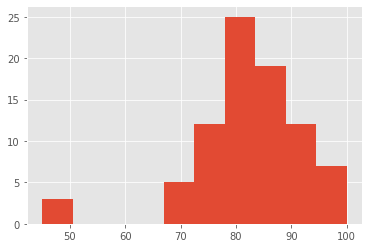

In [300]:
data1["кошки: (02.10.2021 – 02.10.2022)"].hist()

In [301]:
data_dogs = pd.read_csv("data/multiTimeline_1.csv")
data_cats = pd.read_csv("data/multiTimeline_2.csv")

In [302]:
data_cats.head()

,Неделя,кошки
0,2021-10-03,78
1,2021-10-10,75
2,2021-10-17,72
3,2021-10-24,79
4,2021-10-31,99


In [303]:
data_dogs.head()

,Неделя,собаки
0,2021-10-03,59
1,2021-10-10,56
2,2021-10-17,59
3,2021-10-24,60
4,2021-10-31,70


In [304]:
data_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Неделя  52 non-null     object
 1   собаки  52 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes


In [305]:
data_dogs["Запрос"] = "Собаки"

In [306]:
data_cats["Запрос"] = "Кошки"

In [307]:
data_dogs = data_dogs.rename(columns={"собаки": "Количество"})
data_cats = data_cats.rename(columns={"кошки": "Количество"})
data_cats = data_cats.rename(columns={"Неделя": "Дата"})
data_dogs = data_dogs.rename(columns={"Неделя": "Дата"})

In [308]:
data_merge = data_cats.copy()

In [309]:
data_merge = data_merge.merge(data_dogs, how="outer")

In [310]:
data_merge

,Дата,Количество,Запрос
0,2021-10-03,78,Кошки
1,2021-10-10,75,Кошки
2,2021-10-17,72,Кошки
3,2021-10-24,79,Кошки
4,2021-10-31,99,Кошки
...,...,...,...
99,2022-08-28,64,Собаки
100,2022-09-04,64,Собаки
101,2022-09-11,60,Собаки
102,2022-09-18,58,Собаки


In [311]:
data_merge.dtypes

Дата          object
Количество     int64
Запрос        object
dtype: object

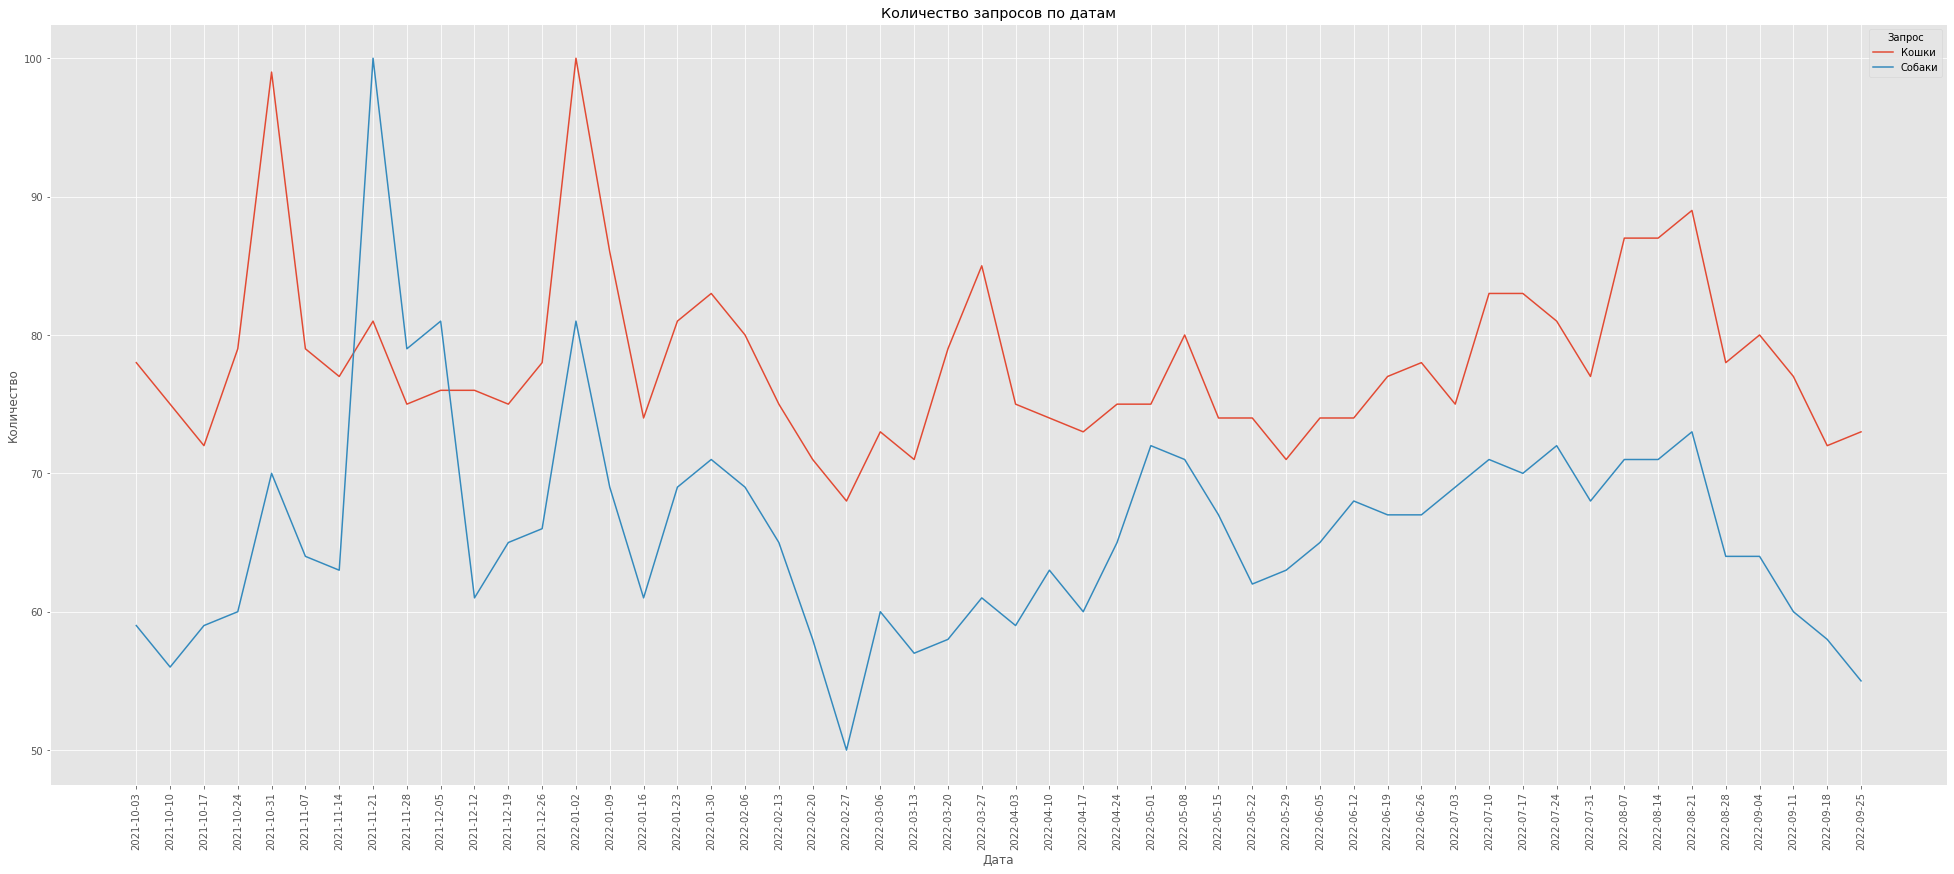

In [312]:
plt.figure(figsize=(34,14))
sns.lineplot(data=data_merge, x="Дата", y="Количество", hue="Запрос")
plt.xticks(rotation=90)
plt.title("Количество запросов по датам")
plt.savefig('charts/white_version/dogs_and_cats.png')
plt.show()